
📊 **Data Analysis and Preparation**

   - **Loading Data**: Data is read from a CSV file.
   - **Data Cleaning**:
      - Selecting relevant columns, such as: Booking_ID, number of adults, room type, lead time, market segment type, booking status, etc.
      - Handling missing values using SimpleImputer.
      - Removing duplicate values if found.
   - **Categorical Analysis and Encoding**: Textual data is converted to numbers using LabelEncoder.

📈 **Graphical Presentation**

   - There are several charts that illustrate cancellation rates by month, price distribution analysis, and other factors affecting bookings.
   Access the App

You can also access the live app for this EDA on Streamlit using the following link:

***https://myprojects-dahmcm7wuefuruuqgzudsz.streamlit.app/***

In [31]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import plotly.subplots as sp
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from datetime import datetime

In [32]:
def wrangle(filepath):
    """
    Reads and preprocesses the dataset from the given CSV file.

    Parameters:
    filepath (str): Path to the CSV file.

    Returns:
    pd.DataFrame: Cleaned and preprocessed DataFrame.
    """
    # Read CSV file
    df = pd.read_csv(filepath)

    # Select relevant columns
    df = df[['Booking_ID', 'number of adults', 'number of children',
             'number of weekend nights', 'number of week nights', 'type of meal',
             'car parking space', 'room type', 'lead time', 'market segment type',
             'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
             'date of reservation', 'booking status']]

    # Convert 'date of reservation' to datetime format
    df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')

    # Extract day, month, and year into separate columns
    df['reservation_day'] = df['date of reservation'].dt.day
    df['reservation_month'] = df['date of reservation'].dt.month
    df['reservation_year'] = df['date of reservation'].dt.year

    # Drop the original 'date of reservation' column
    df.drop(columns=['date of reservation'], inplace=True)

    # Handle missing values
    if df.isnull().sum().sum() > 0:
        imputer = SimpleImputer(strategy='mean')  # Replace missing values with column mean
        numeric_columns = df.select_dtypes(include='number').columns
        df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

    # Remove duplicate values
    if df.duplicated().sum() > 0:
        df.drop_duplicates(inplace=True)

    # Encode categorical features
    encoder = LabelEncoder()
    for col in df.select_dtypes(include='object'):
        df[col] = encoder.fit_transform(df[col].astype(str))

    return df

# Load and preprocess data
df = wrangle('/content/first inten project.csv')
df.head()


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,reservation_day,reservation_month,reservation_year
0,0,1.0,1.0,2.0,5.0,0,0.0,0,224.0,3,0.0,0.0,0.0,88.00,0.0,1,2.0,10.0,2015.0
1,1,1.0,0.0,1.0,3.0,3,0.0,0,5.0,4,0.0,0.0,0.0,106.68,1.0,1,6.0,11.0,2018.0
2,2,2.0,1.0,1.0,3.0,0,0.0,0,1.0,4,0.0,0.0,0.0,50.00,0.0,0,28.0,2.0,2018.0
3,3,1.0,0.0,0.0,2.0,0,0.0,0,211.0,4,0.0,0.0,0.0,100.00,1.0,0,20.0,5.0,2017.0
4,4,1.0,0.0,1.0,2.0,3,0.0,0,48.0,4,0.0,0.0,0.0,77.00,0.0,0,11.0,4.0,2018.0


# Dataset framwork

In [33]:
print(df.columns)
df.head()

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'booking status', 'reservation_day', 'reservation_month',
       'reservation_year'],
      dtype='object')


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,reservation_day,reservation_month,reservation_year
0,0,1.0,1.0,2.0,5.0,0,0.0,0,224.0,3,0.0,0.0,0.0,88.00,0.0,1,2.0,10.0,2015.0
1,1,1.0,0.0,1.0,3.0,3,0.0,0,5.0,4,0.0,0.0,0.0,106.68,1.0,1,6.0,11.0,2018.0
2,2,2.0,1.0,1.0,3.0,0,0.0,0,1.0,4,0.0,0.0,0.0,50.00,0.0,0,28.0,2.0,2018.0
3,3,1.0,0.0,0.0,2.0,0,0.0,0,211.0,4,0.0,0.0,0.0,100.00,1.0,0,20.0,5.0,2017.0
4,4,1.0,0.0,1.0,2.0,3,0.0,0,48.0,4,0.0,0.0,0.0,77.00,0.0,0,11.0,4.0,2018.0


# Dataset Summary

In [35]:
# Summary Statistics
def data_summary(df):
    print("\n📌 Dataset Info:")
    print(df.info())

    print("\n📌 Summary Statistics:")
    print(df.describe())



data_summary(df)


📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  int64  
 1   number of adults          36285 non-null  float64
 2   number of children        36285 non-null  float64
 3   number of weekend nights  36285 non-null  float64
 4   number of week nights     36285 non-null  float64
 5   type of meal              36285 non-null  int64  
 6   car parking space         36285 non-null  float64
 7   room type                 36285 non-null  int64  
 8   lead time                 36285 non-null  float64
 9   market segment type       36285 non-null  int64  
 10  repeated                  36285 non-null  float64
 11  P-C                       36285 non-null  float64
 12  P-not-C                   36285 non-null  float64
 13  average price             36285 non-null  fl

In [36]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,reservation_day,reservation_month,reservation_year
0,0,1.0,1.0,2.0,5.0,0,0.0,0,224.0,3,0.0,0.0,0.0,88.00,0.0,1,2.0,10.0,2015.0
1,1,1.0,0.0,1.0,3.0,3,0.0,0,5.0,4,0.0,0.0,0.0,106.68,1.0,1,6.0,11.0,2018.0
2,2,2.0,1.0,1.0,3.0,0,0.0,0,1.0,4,0.0,0.0,0.0,50.00,0.0,0,28.0,2.0,2018.0
3,3,1.0,0.0,0.0,2.0,0,0.0,0,211.0,4,0.0,0.0,0.0,100.00,1.0,0,20.0,5.0,2017.0
4,4,1.0,0.0,1.0,2.0,3,0.0,0,48.0,4,0.0,0.0,0.0,77.00,0.0,0,11.0,4.0,2018.0


# Boxplots for Outlier Detection

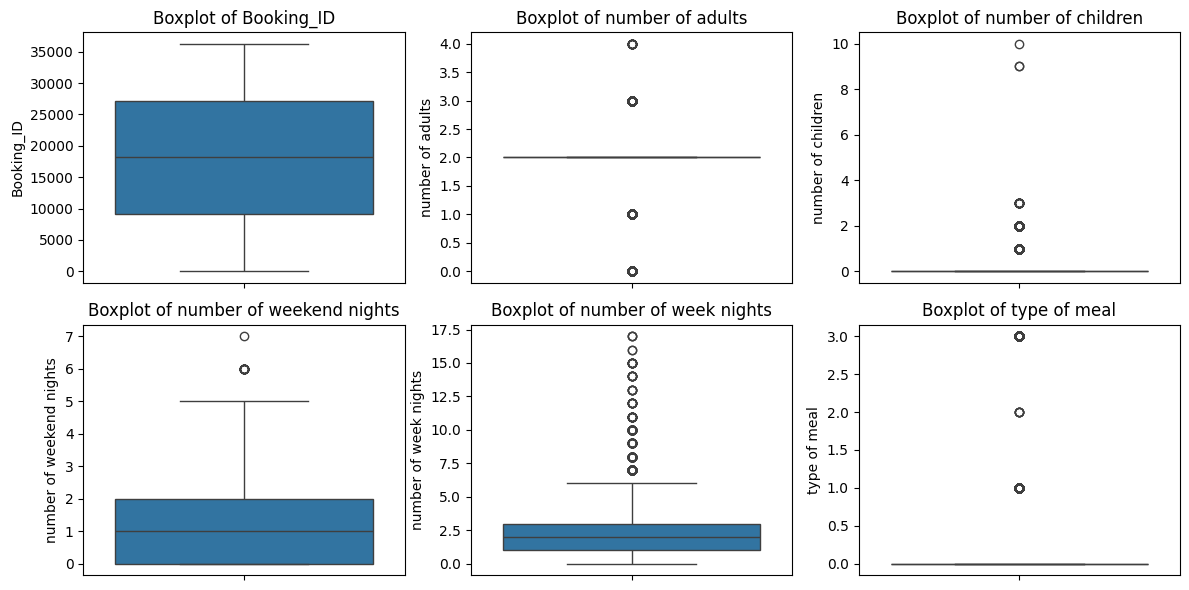

In [37]:

def plot_boxplots(df):
    """
    Generates boxplots for the first six numerical columns in the dataframe
    to visually detect outliers.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    """
    num_cols = df.select_dtypes(include=['number']).columns

    plt.figure(figsize=(12, 6))
    for i, col in enumerate(num_cols[:6]):  # Limit to first 6 numerical columns
        plt.subplot(2, 3, i + 1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# Example usage
plot_boxplots(df)


# Scatterplot

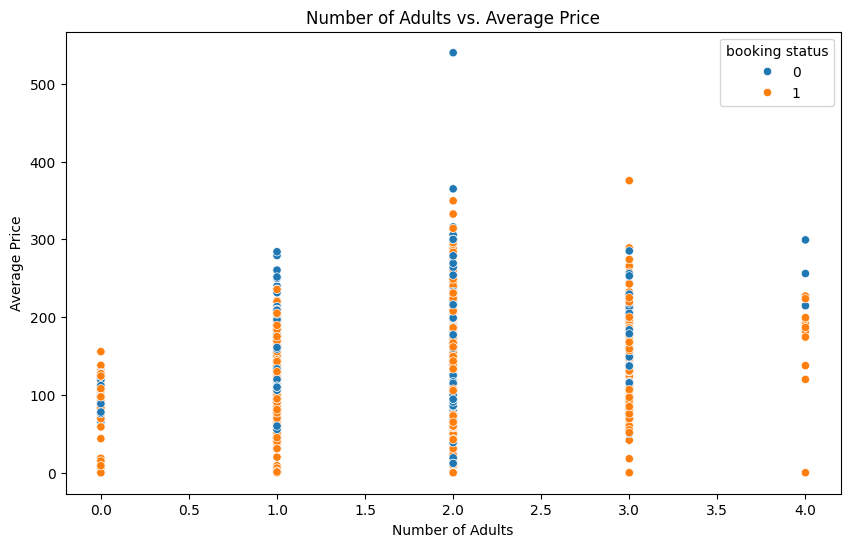

In [38]:
# Scatterplot to visualize the relationship between number of adults and average price
def plot_scatter(df):
    """
    Creates a scatterplot to show the relationship between the number of adults
    and the average price, with booking status as the hue.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['number of adults'], y=df['average price '], hue=df['booking status'])
    plt.title("Number of Adults vs. Average Price")
    plt.xlabel("Number of Adults")
    plt.ylabel("Average Price")
    plt.show()

# Example usage
plot_scatter(df)

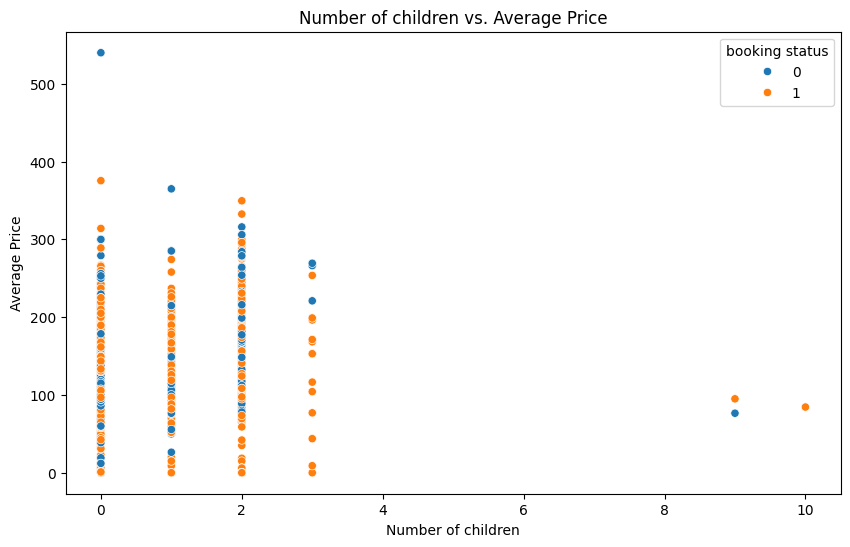

In [39]:
# Scatterplot to visualize the relationship between number of children and average price
def plot_scatter(df):
    """
    Creates a scatterplot to show the relationship between the number of children
    and the average price, with booking status as the hue.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['number of children'], y=df['average price '], hue=df['booking status'])
    plt.title("Number of children vs. Average Price")
    plt.xlabel("Number of children")
    plt.ylabel("Average Price")
    plt.show()

# Example usage
plot_scatter(df)

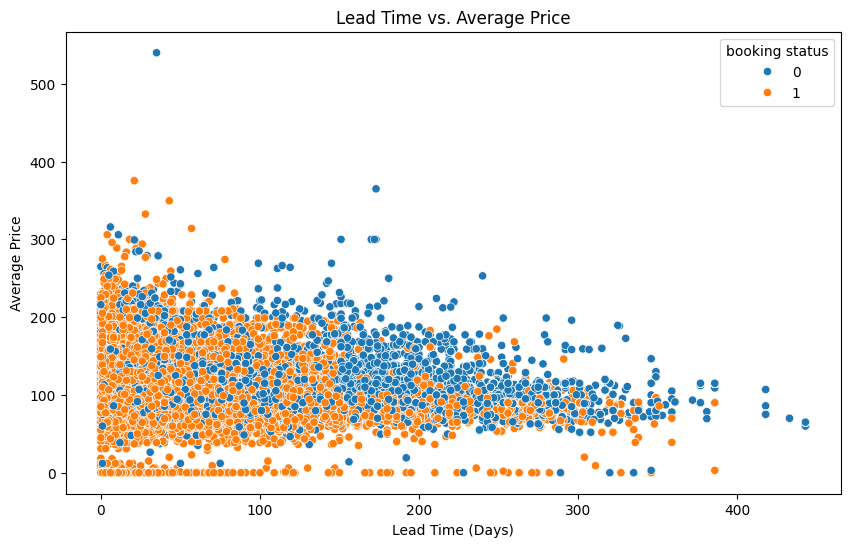

In [40]:
# Scatterplot to visualize the relationship between lead time and average price
def plot_lead_time_vs_price(df):
    """
    Creates a scatterplot to show the relationship between lead time and
    average price, with booking status as the hue.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['lead time'], y=df['average price '], hue=df['booking status'])
    plt.title("Lead Time vs. Average Price")
    plt.xlabel("Lead Time (Days)")
    plt.ylabel("Average Price")
    plt.show()

# Example usage
plot_lead_time_vs_price(df)



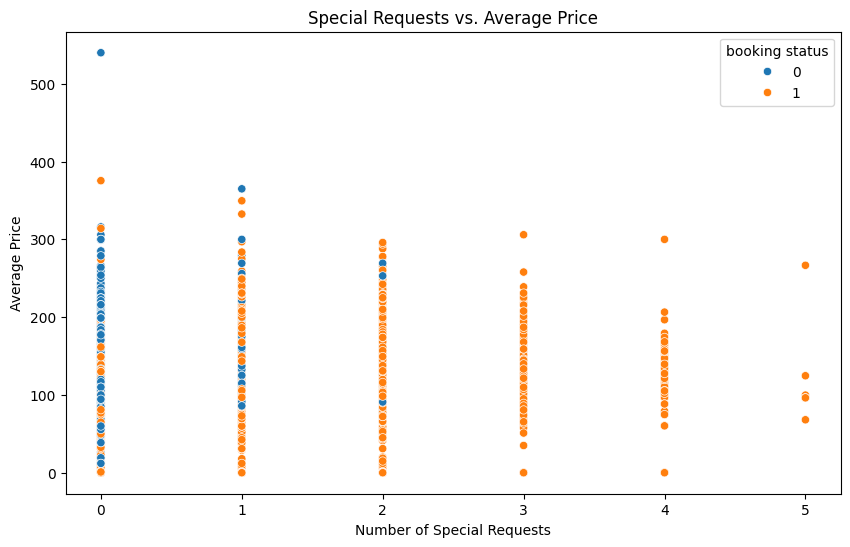

In [41]:
# Scatterplot to visualize the relationship between special requests and average price
def plot_special_requests_vs_price(df):
    """
    Creates a scatterplot to show the relationship between the number of special
    requests and the average price, with booking status as the hue.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['special requests'], y=df['average price '], hue=df['booking status'])
    plt.title("Special Requests vs. Average Price")
    plt.xlabel("Number of Special Requests")
    plt.ylabel("Average Price")
    plt.show()

# Example usage
plot_special_requests_vs_price(df)

# subplot

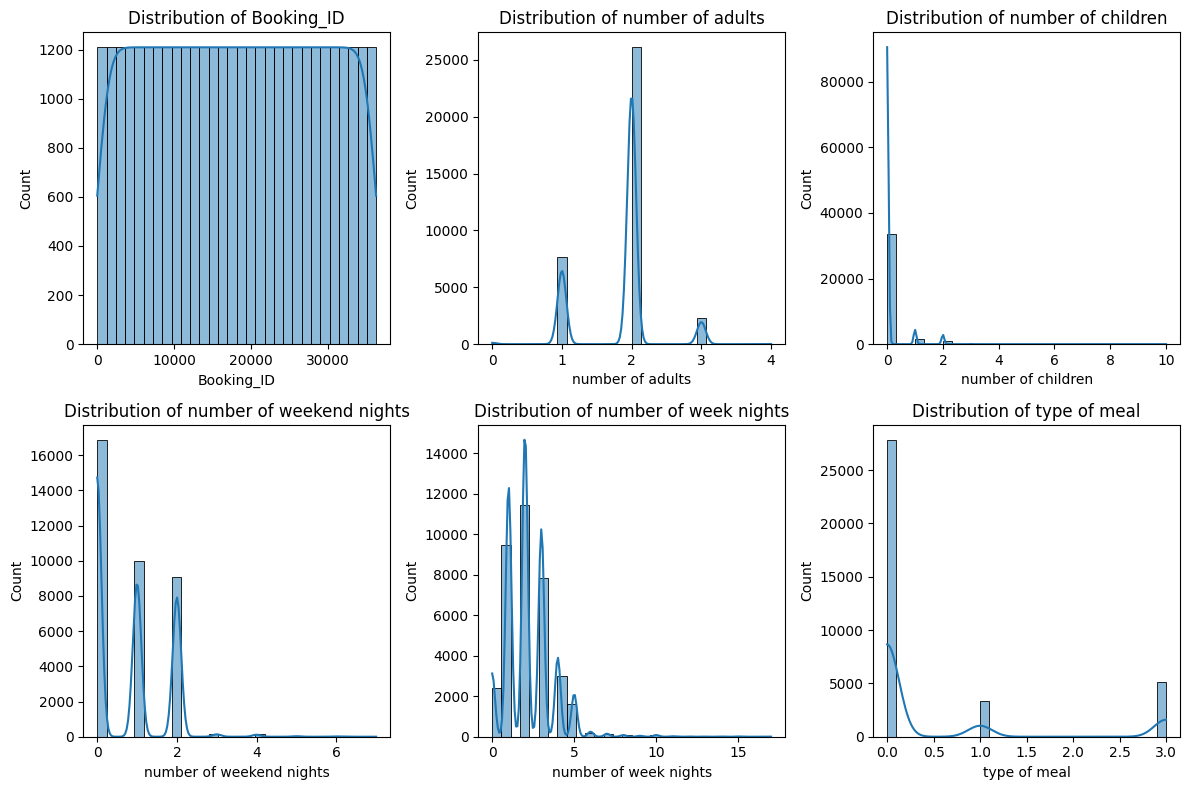

In [42]:
# Function to plot distributions of numerical columns
def plot_distributions(df):
    """
    Plots the distributions of the first six numerical columns in the dataframe
    using histograms with KDE (Kernel Density Estimation).

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    """
    num_cols = df.select_dtypes(include=['number']).columns

    plt.figure(figsize=(12, 8))
    for i, col in enumerate(num_cols[:6]):  # Limit to first 6 numerical columns
        plt.subplot(2, 3, i + 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Example usage
plot_distributions(df)


# Feature Correlation Heatmap

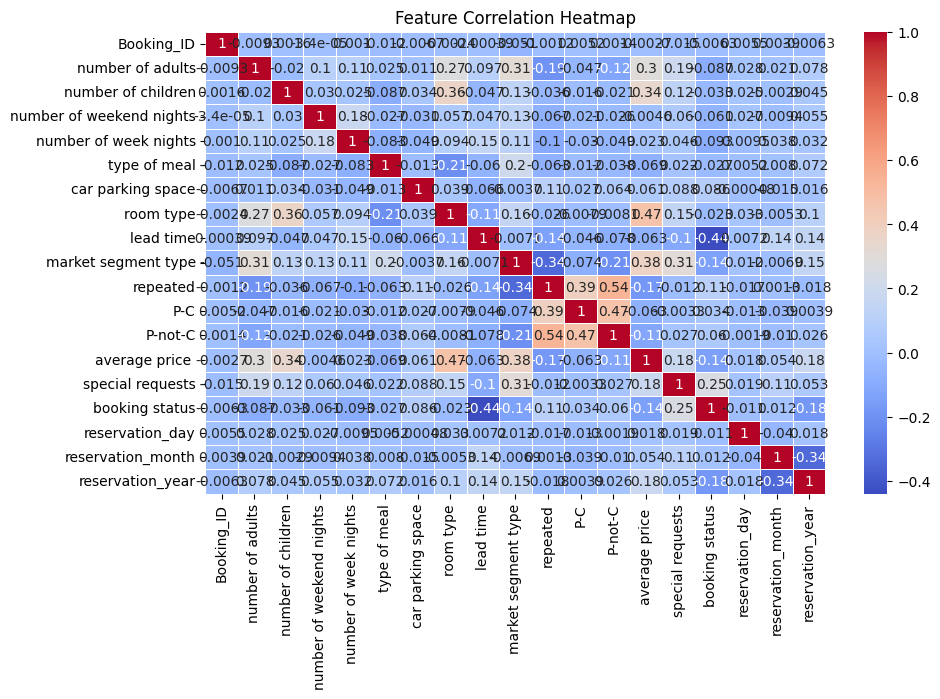

In [43]:
# Function to plot a correlation heatmap
def plot_correlation(df):
    """
    Plots a heatmap to visualize the correlation between numerical features
    in the dataframe.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    """
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.show()

# Example usage
plot_correlation(df)


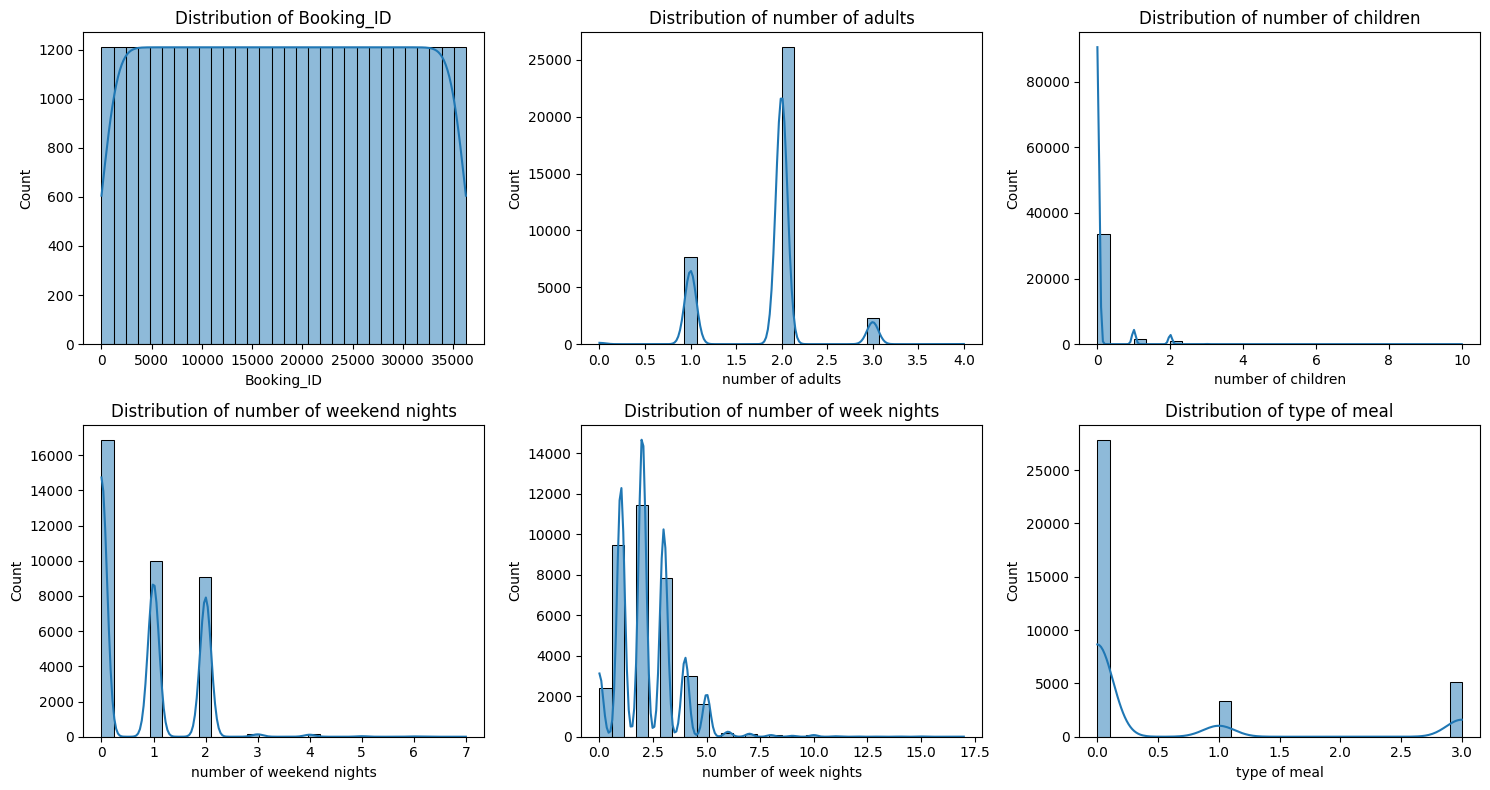

In [44]:
# 1. تمثيل التوزيعات (Distributions)
def plot_distributions(df, num_cols=6):
    """
    Plots the distributions of numerical columns in the dataframe.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    num_cols (int): Number of numerical columns to display (default is 6).
    """
    numeric_columns = df.select_dtypes(include=['number']).columns[:num_cols]

    plt.figure(figsize=(15, 8))
    for i, col in enumerate(numeric_columns):
        plt.subplot(2, 3, i + 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()
plot_distributions(df)

<ipython-input-45-ce9e18ccffb4>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellations_by_month.index, y=cancellations_by_month.values, palette='coolwarm')


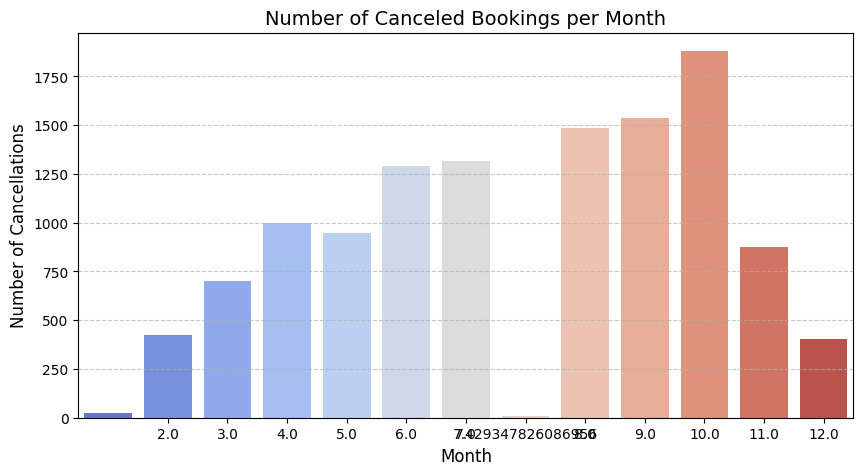

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cancellations_by_month(df):
    """
    Plots the number of canceled bookings per month.

    Parameters:
    df (pd.DataFrame): Preprocessed DataFrame with reservation_month and booking status.

    Returns:
    None
    """
    # تصفية الحجوزات الملغاة
    canceled_df = df[df['booking status'] == 0]  # نفترض أن 0 تعني إلغاء الحجز

    # حساب عدد الحجوزات الملغاة لكل شهر
    cancellations_by_month = canceled_df.groupby('reservation_month').size()

    # رسم المخطط
    plt.figure(figsize=(10, 5))
    sns.barplot(x=cancellations_by_month.index, y=cancellations_by_month.values, palette='coolwarm')

    # تخصيص العنوان والمحاور
    plt.title('Number of Canceled Bookings per Month', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Cancellations', fontsize=12)
    plt.xticks(range(1, 13))  # الأشهر من 1 إلى 12
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # عرض المخطط
    plt.show()

# استدعاء الدالة
plot_cancellations_by_month(df)

